In [1]:
import numpy as np
import scipy.stats as sps
from scipy.special import erfinv

import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
N = 50000

Википедия сказала, что паретто имеет чуть другой вид, поэтому $\theta ^* = \theta - 1$.

Возьмем $\theta = 5$, тогда $\theta ^* = 4$

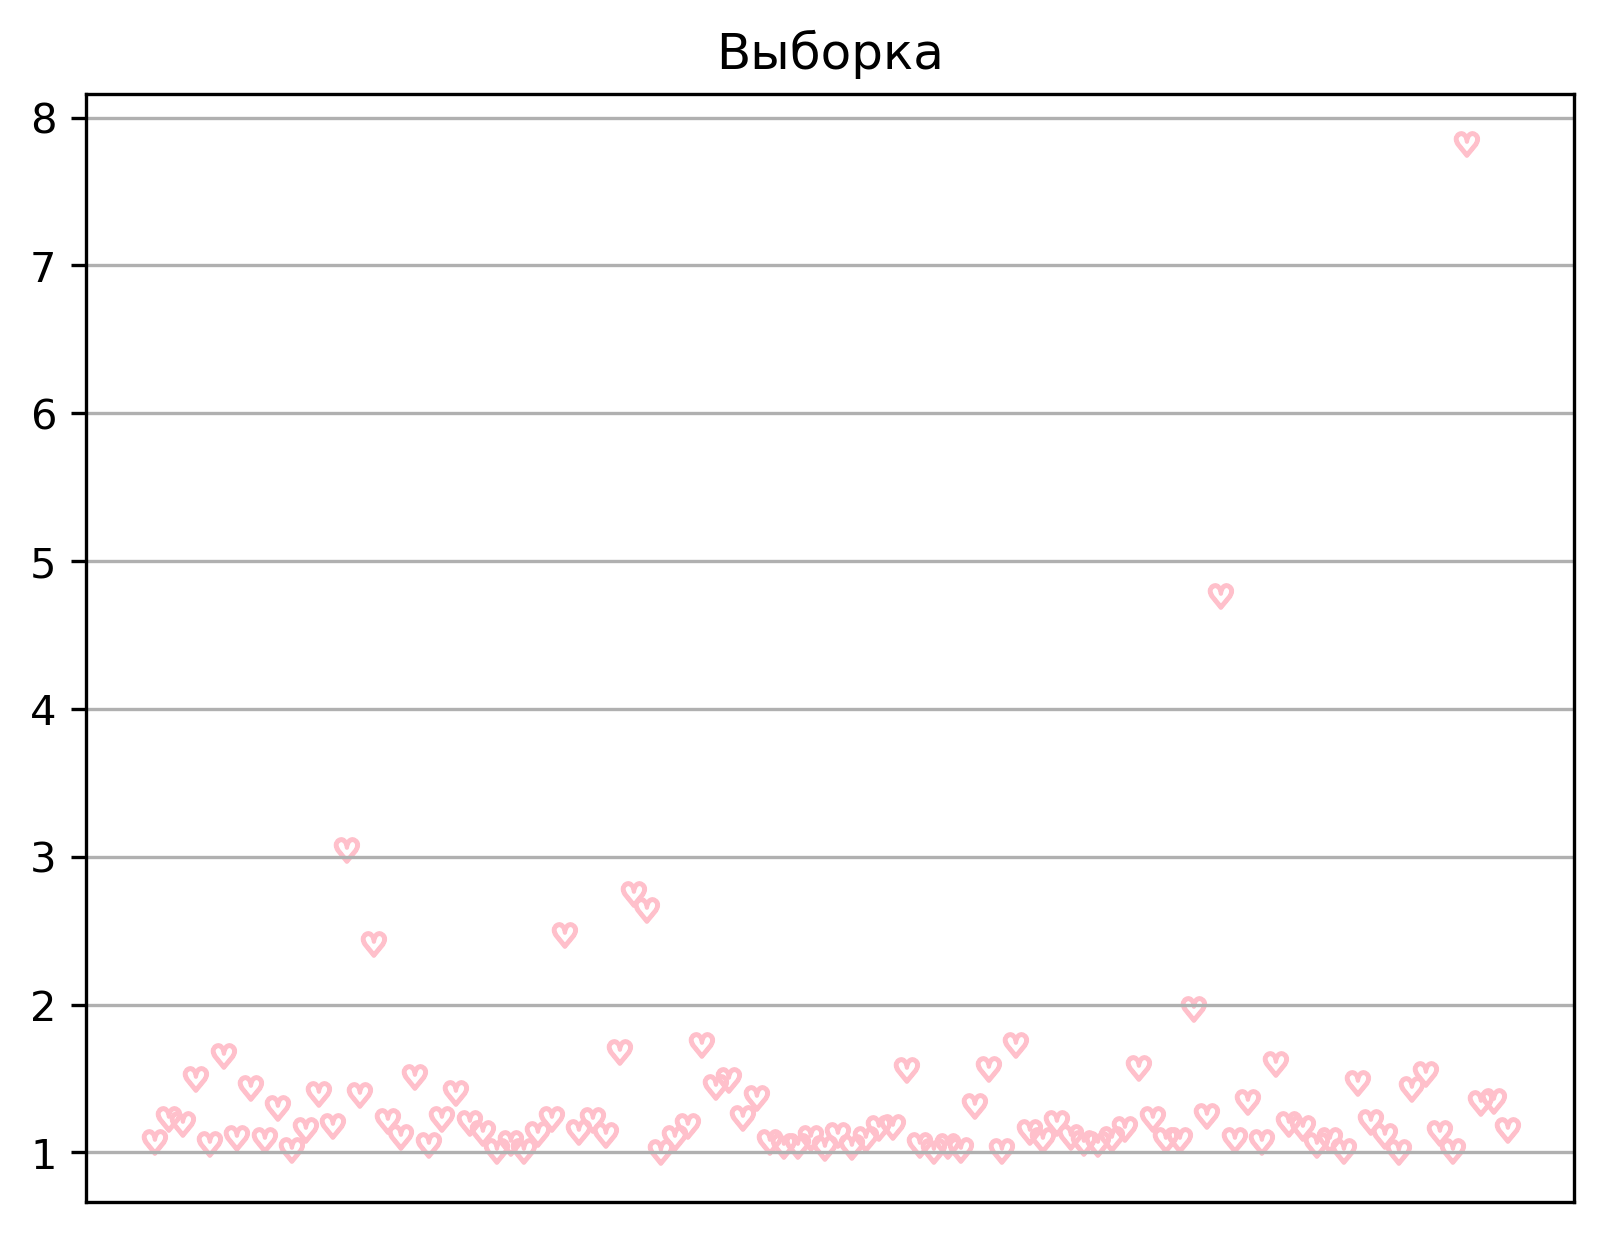

In [3]:
sample = sps.pareto.rvs(4, size=100)
n = len(sample)
beta_probability = 0.95
X = np.arange(1, 101)
Y = sample

fig, ax = plt.subplots(dpi=300)

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticks([])

ax.grid(True)

ax.scatter(X, Y, marker='$\heartsuit$', color='pink')
ax.set_title("Выборка")

plt.show()

## Доверительный интервал для медианы

In [4]:
theta_wave = n / sum(np.log(sample)) + 1
equal_part = np.sqrt(2) * erfinv(-beta_probability) * 2 ** (1 / (theta_wave - 1)) * np.log(2) / (theta_wave - 1) ** 2 / np.sqrt(n)
h1 = equal_part + (2 ** (1 / (theta_wave - 1)))
h2 = -equal_part + (2 ** (1 / (theta_wave - 1)))
print('Доверительный интервал для медианы: [', h1, h2, '] Длина: ', h2 - h1)

Доверительный интервал для медианы: [ 1.1835350924781183 1.2048001710958156 ] Длина:  0.02126507861769733


## Асимптотический доверительный интервал по ОМП для медианы

In [5]:
omp_h1 = np.sqrt(2 / n) * (theta_wave - 1) * erfinv(-beta_probability) + theta_wave
omp_h2 = -np.sqrt(2 / n) * (theta_wave - 1) * erfinv(-beta_probability) + theta_wave
print('Асимптотический доверительный интервал по ОМП: [', omp_h1, omp_h2, '] Длина: ', omp_h2 - omp_h1)

Асимптотический доверительный интервал по ОМП: [ 4.140573193229576 5.67176293857546 ] Длина:  1.531189745345884


## Асимптотический доверительный интервал по ОММ для медианы

In [6]:
x_mean = np.mean(sample)
x_square_mean = np.mean(sample ** 2)
omm_equal_part = np.sqrt((2 / n)) * erfinv(-beta_probability) * (np.sqrt(x_square_mean) - x_mean ** 2) / ((x_mean - 1) ** 2)
omm_h2 = omm_equal_part + (1 / (x_mean - 1)) + 2
omm_h1 = -omm_equal_part + (1 / (x_mean - 1)) + 2
print('Асимптотический доверительный интервал по ОММ: [', omm_h1, omm_h2, '] Длина: ', omm_h2 - omm_h1)

Асимптотический доверительный интервал по ОММ: [ 4.149633059243486 4.966486565396737 ] Длина:  0.8168535061532509


## Параметрический bootstrap для медианы

In [7]:
median = 2 ** (1 / (theta_wave - 1))
p_bootstrap_median = np.array([sps.pareto.rvs(theta_wave - 1, size=len(sample)) for _ in range(N)])

theta_waves_median = []
for p_sample_median in p_bootstrap_median:
    wave = n / np.sum(np.log(p_sample_median)) + 1
    theta_waves_median.append(2 ** (1 / (wave - 1)))

theta_waves_median = np.sort(theta_waves_median)
k1_median = int((1 - beta_probability) * N / 2) - 1
k2_median = int((1 + beta_probability) * N / 2) - 1

p_h1_median = theta_waves_median[k1_median]
p_h2_median = theta_waves_median[k2_median]
print('Параметрический bootstrap медиана: [', p_h1_median, p_h2_median, '] Длина: ', p_h2_median - p_h1_median)

Параметрический bootstrap медиана: [ 1.1552844887606568 1.2385390187320864 ] Длина:  0.08325452997142957


## Непараметрический bootstrap медиана

In [8]:
np_bootstrap_median = np.array([np.random.choice(sample, 100) for _ in range(1000)])

median = 2 ** (1 / (theta_wave - 1))

np_thetas_median = []
for np_sample in np_bootstrap_median:
    np_thetas_median.append(np.median(np_sample) - median)

np_thetas_median.sort()
np_h1_median = -np_thetas_median[974] + median
np_h2_median = -np_thetas_median[24] + median
print('Непараметрический bootstrap медиана: [', np_h1_median, np_h2_median, '] Длина: ', np_h2_median - np_h1_median)

Непараметрический bootstrap медиана: [ 1.1775694610373535 1.2737442039929423 ] Длина:  0.09617474295558881


## Сравнение

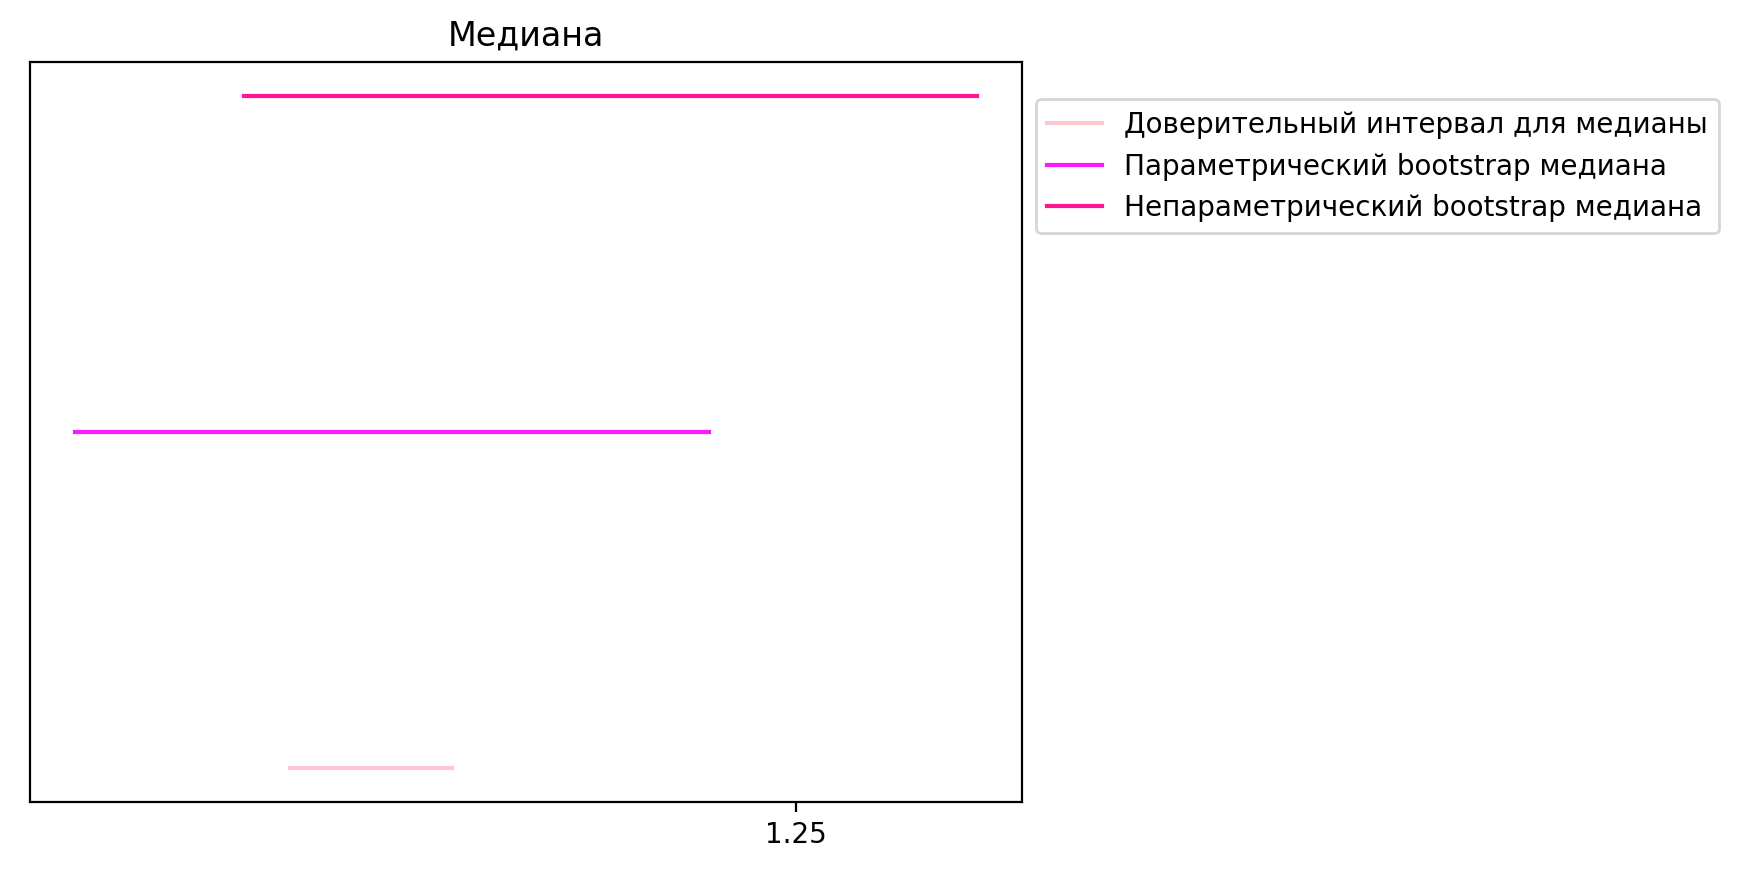

In [9]:
fig4, ax4 = plt.subplots(dpi=200)

ax4.plot([h1, h2], [1, 1], color='pink', label='Доверительный интервал для медианы', alpha=0.9)
ax4.plot([p_h1_median, p_h2_median], [1.2, 1.2], color='fuchsia',  label='Параметрический bootstrap медиана', alpha=0.9)
ax4.plot([np_h1_median, np_h2_median], [1.4, 1.4], color='deeppink', label='Непараметрический bootstrap медиана')

ax4.set_yticks([])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(0.25))

ax4.set_title("Медиана")
ax4.legend(loc='lower left', bbox_to_anchor=(1, 0.75))

plt.show()

## Параметрический bootstrap ОМП

In [10]:
p_bootstrap_omp = np.array([sps.pareto.rvs(theta_wave - 1, size=len(sample)) for _ in range(N)])

theta_waves = []
for p_sample_omp in p_bootstrap_omp:
    theta_waves.append(n / np.sum(np.log(p_sample_omp)) + 1)

theta_waves = np.sort(theta_waves)
k1 = int((1 - beta_probability) * N / 2) - 1
k2 = int((1 + beta_probability) * N / 2) - 1

p_h1 = theta_waves[k1]
p_h2 = theta_waves[k2]
print('Параметрический bootstrap ОМП: [', p_h1, p_h2, ' ] Длина: ', p_h2 - p_h1)

Параметрический bootstrap ОМП: [ 4.24032823614635 5.799951281578536  ] Длина:  1.5596230454321853


## Параметрический bootstrap ОММ

In [11]:
x_mean = 1 / (np.mean(sample) - 1) + 2

p_bootstrap_omm = np.array([sps.pareto.rvs(x_mean - 1, size=len(sample)) for _ in range(N)])

theta_waves_omm = []
for p_sample_omm in p_bootstrap_omm:
    theta_waves_omm.append(1 / (np.mean(p_sample_omm) - 1) + 2)

theta_waves_omm = np.sort(theta_waves_omm)
k1_omm = int((1 - beta_probability) * N / 2) - 1
k2_omm = int((1 + beta_probability) * N / 2) - 1

p_h1_omm = theta_waves_omm[k1_omm]
p_h2_omm = theta_waves_omm[k2_omm]
print('Параметрический bootstrap ОМП: [ ', p_h1_omm, p_h2_omm, '] Длина: ', p_h2_omm - p_h1_omm)

Параметрический bootstrap ОМП: [  3.9173246495299345 5.413736770965338 ] Длина:  1.4964121214354034


## Непараметрический bootstrap ОМП

In [12]:
np_bootstrap_omp = np.array([np.random.choice(sample, 100) for _ in range(1000)])

theta_wave = n / np.sum(np.log(sample)) + 1
np_thetas = []
for np_sample in np_bootstrap_omp:
    theta_star = (n / np.sum(np.log(np_sample)) + 1)
    np_thetas.append(theta_star - theta_wave)

np_thetas.sort()
np_h1 = -np_thetas[974] + theta_wave
np_h2 = -np_thetas[24] + theta_wave
print('Непараметрический bootstrap ОМП: [ ', np_h1, np_h2, ' ] Длина: ', np_h2 - np_h1)

Непараметрический bootstrap ОМП: [  3.790244876031352 5.698559043639358  ] Длина:  1.9083141676080064


## Непараметрический bootstrap ОММ

In [13]:
np_bootstrap_omm = np.array([np.random.choice(sample, 100) for _ in range(1000)])

x_mean = 1 / (np.mean(sample) - 1) + 2
np_thetas_omm = []
for np_sample in np_bootstrap_omm:
    theta_star = 1 / (np.mean(np_sample) - 1) + 2
    np_thetas_omm.append(theta_star - x_mean)

np_thetas_omm.sort()
np_h1_omm = -np_thetas_omm[974] + x_mean
np_h2_omm = -np_thetas_omm[24] + x_mean
print('Непараметрический bootstrap ОММ: [ ', np_h1_omm, np_h2_omm, ' ] Длина: ', np_h2 - np_h1)

Непараметрический bootstrap ОММ: [  3.2204360922512816 5.347034040502201  ] Длина:  1.9083141676080064


## Сравнение ОМП

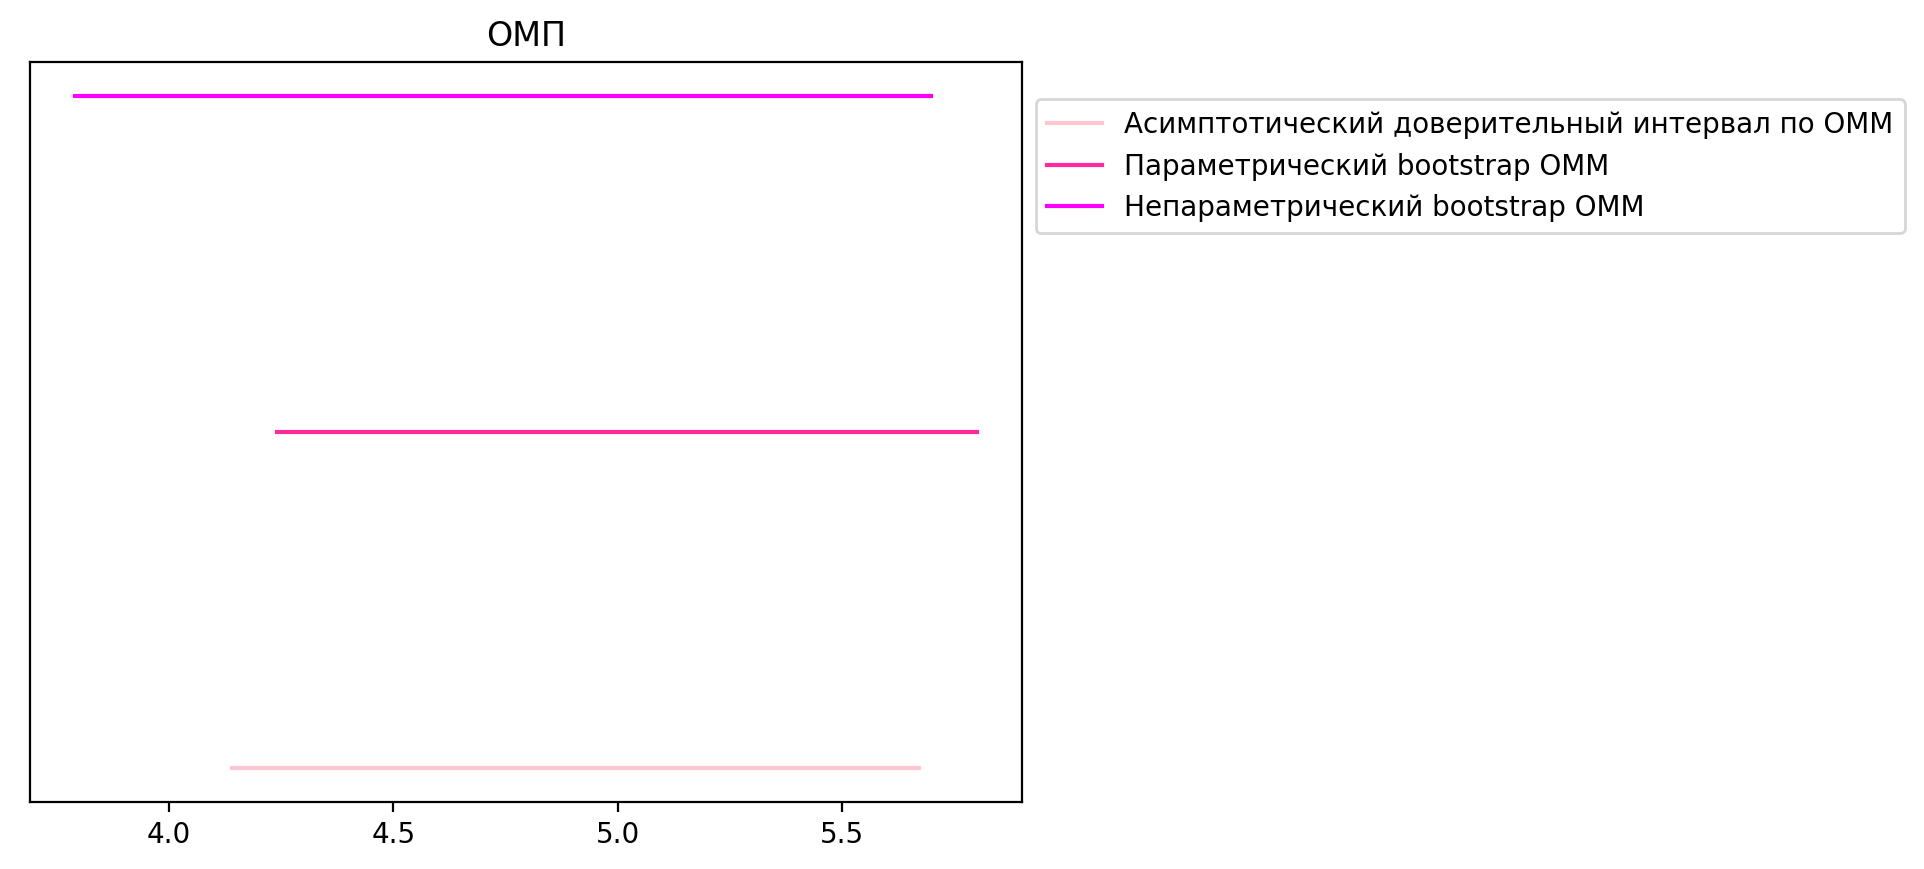

In [14]:
fig3, ax3 = plt.subplots(dpi=200)

ax3.plot([omp_h1, omp_h2], [1, 1], color='pink', label='Асимптотический доверительный интервал по ОММ', alpha=0.9)
ax3.plot([p_h1, p_h2], [1.2, 1.2], color='deeppink',  label='Параметрический bootstrap ОММ', alpha=0.9)
ax3.plot([np_h1, np_h2], [1.4, 1.4], color='fuchsia', label='Непараметрический bootstrap ОММ')

ax3.set_yticks([])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax3.set_title("ОМП")
ax3.legend(loc='lower left', bbox_to_anchor=(1, 0.75))

plt.show()

## Сравнение ОММ

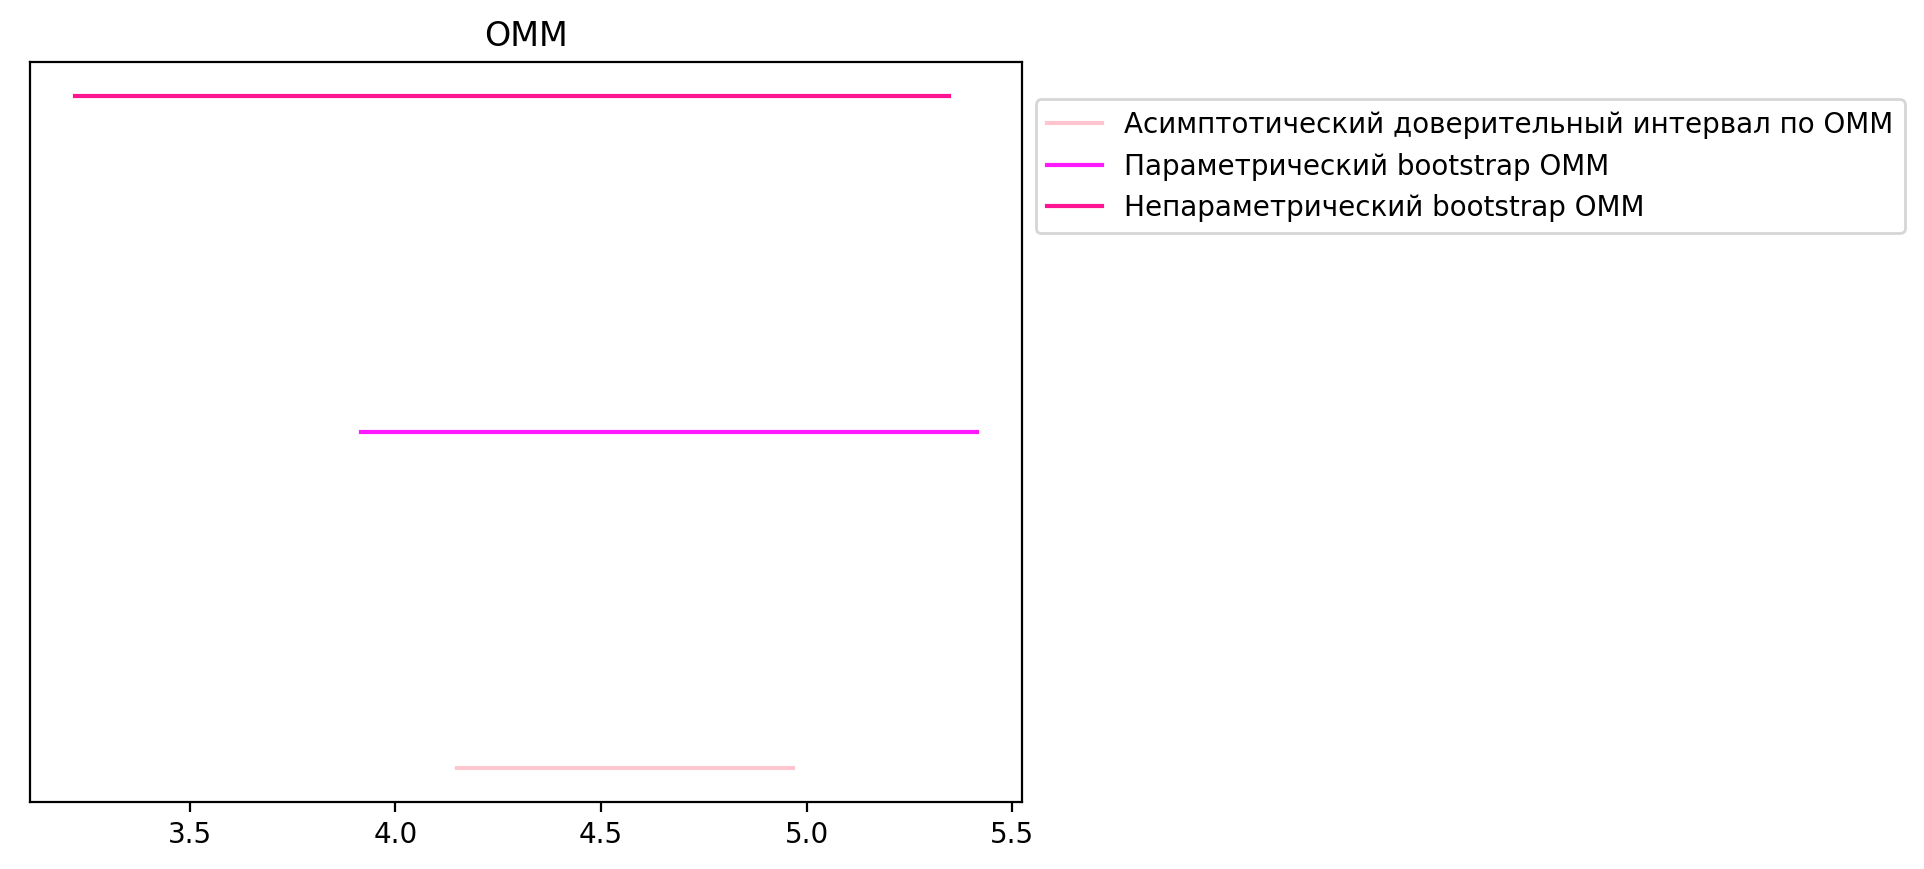

In [15]:
fig2, ax2 = plt.subplots(dpi=200)

ax2.plot([omm_h1, omm_h2], [1, 1], color='pink', label='Асимптотический доверительный интервал по ОММ', alpha=0.9)
ax2.plot([p_h1_omm, p_h2_omm], [1.2, 1.2], color='fuchsia',  label='Параметрический bootstrap ОММ', alpha=0.9)
ax2.plot([np_h1_omm, np_h2_omm], [1.4, 1.4], color='deeppink', label='Непараметрический bootstrap ОММ')

ax2.set_yticks([])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax2.set_title("ОММ")
ax2.legend(loc='lower left', bbox_to_anchor=(1, 0.75))

plt.show()